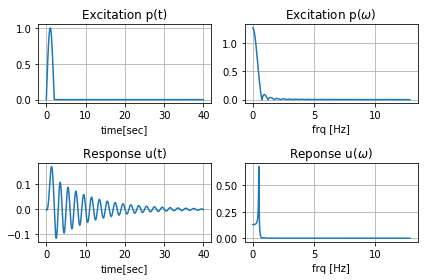

In [2]:
# 문제 내용
# 질량 1, 고유주기 2 sec, 감쇠비 0.1 인 시스템에 대해
# Half-sine 함수가 외부하중으로 주어질 경우
# 1024개의 데이터, 총 시간 40 sec이다.
# 출처: https://wikidocs.net/14636

import numpy as np
import matplotlib.pyplot as plt

# Signal properties
N=1024; T=40; dt =T/N
t = np.arange(0,N*dt,dt)   # [0,dt, ..., (N-1)*dt]

# System properties
Tn = 2.;
xi = 0.1;

wn = 2*np.pi/Tn # 입력주파수 구하는 공식을 나타낸 것 2N파이 / 주기 T인데 미분형식으로 표현

m = 1
c = 2*m*wn*xi
k = wn*wn

# Excitation force
p0 = 1; td = 2;
p = np.zeros(N)
p[t<td] = np.sin(np.pi*t[t<td]/td)

# Frequency response
df = 1/T
f = np.arange(0,N*df,df)   #[0,df,...,(N-1)*df]
w = 2*np.pi*f

pf = np.fft.fft(p)*dt
H = 1/(-w*w*m+c*m*1j+k)


uf = pf*H
for i in range(0,int(N/2)):
    uf[N-i-1] = np.conjugate(uf[i+1])

ut = np.real(np.fft.ifft(uf)/dt)    


plt.subplot(2,2,1)
plt.plot(t,p)
plt.title('Excitation p(t)'); plt.xlabel('time[sec]')
plt.grid()

plt.subplot(2,2,2)
plt.plot(f[0:int(N/2+1)],abs(pf[0:int(N/2+1)]))
plt.title(r'Excitation p($\omega$)'); plt.xlabel('frq [Hz]')
plt.grid()


plt.subplot(2,2,3)
plt.plot(t,ut)
plt.title('Response u(t)'); plt.xlabel('time[sec]')
plt.grid()

plt.subplot(2,2,4)
plt.plot(f[0:int(N/2+1)],np.abs(uf[0:int(N/2+1)]))
plt.title(r'Reponse u($\omega$)'); plt.xlabel('frq [Hz]')
plt.grid()


plt.tight_layout()